### Which day of the week?
Hurricane Andrew, which hit Florida on August 24, 1992, was one of the costliest and deadliest hurricanes in US history. Which day of the week did it make landfall?

Let's walk through all of the steps to figure this out.

In [158]:
from datetime import date

In [159]:
# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


### How many hurricanes come early?
In this chapter, you will work with a list of the hurricanes that made landfall in Florida from 1950 to 2017. There were 235 in total. Check out the variable `florida_hurricane_dates`, which has all of these dates.

Atlantic hurricane season officially begins on June 1. How many hurricanes since 1950 have made landfall in Florida before the official start of hurricane season?

In [160]:
# Import the florida_hurricane_dates list from the data module
# This list contains date objects for all hurricanes that made landfall in Florida from 1950 to 2017
from data.florida_hurricane_data import florida_hurricane_dates

In [161]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
    # Check if the month is before June (month number 6)
    if hurricane.month < 6:
        early_hurricanes = early_hurricanes + 1

print(early_hurricanes)

10


## Working with Dates in Python

In data analysis, dates are not merely pieces of text; they are complex data points that carry intrinsic chronological meaning. While it is possible to represent a date as a string, such as `"10/7/2016"`, this approach is fundamentally limited and error-prone. It raises immediate, practical questions that are remarkably difficult to answer with string manipulation alone:

* **How many days have elapsed between two dates?** Subtracting one string from another is not a meaningful operation.
* **How can you sort a list of dates chronologically?** A simple string sort would incorrectly place `"10/7/2016"` after `"6/21/2017"` because the string `"10"` is lexicographically greater than `"6"`.
* **Which day of the week did a date fall on?** This information is not present in the string itself and requires a calendar context.
* **How can you filter for dates within a specific range?** Each string would need to be parsed and converted, an inefficient and complex process.

To solve these problems, Python provides a dedicated `date` object within the built-in `datetime` module. A `date` object is not just a container for characters; it is a rich, calendar-aware data structure that enables intuitive comparisons, arithmetic, and attribute access.

### Creating and Inspecting `date` Objects

The first step is to convert date-like strings or raw numbers into `date` objects. This is done by importing the `date` class and instantiating it with the year, month, and day.

* **Why**: Creating a `date` object transforms raw information into a structured format that Python understands natively, unlocking a vast range of date-specific functionality.
* **How**: Use the constructor `date(year, month, day)`.

Once you have a `date` object, you can easily access its individual components as attributes.

```python
# Import the date class from the datetime module
from datetime import date

# Create two date objects
d1 = date(2016, 10, 7)
d2 = date(2017, 6, 21)

print(f"Original date object: {d1}")

# Access the object's attributes
print(f"Year: {d1.year}")
print(f"Month: {d1.month}")
print(f"Day: {d1.day}")
```

A particularly useful method is `.weekday()`, which returns the day of the week as an integer, where Monday is `0` and Sunday is `6`.

```python
# Find the day of the week for the first date
# Monday = 0, Tuesday = 1, ..., Sunday = 6
weekday_index = d1.weekday()

print(f"\nWeekday for {d1}: {weekday_index}") # Friday corresponds to index 4
```

### Date Arithmetic and Comparisons

The true power of `date` objects becomes apparent when you perform arithmetic and comparisons. Python overloads the standard mathematical operators for `date` objects, allowing them to be manipulated in a chronologically aware manner.

#### Comparisons

`date` objects can be compared directly using standard operators (`<`, `>`, `==`, `<=`, etc.). This makes sorting and finding the minimum or maximum date in a sequence trivial.

```python
# Create two date objects
date_A = date(2025, 11, 5)
date_B = date(2025, 12, 4)

# Direct comparison
is_A_earlier = date_A < date_B
print(f"Is date_A earlier than date_B? {is_A_earlier}")

# Finding the minimum in a list
date_list = [date_B, date_A]
earliest_date = min(date_list)
print(f"The earliest date in the list is: {earliest_date}")
```

#### The `timedelta` Object

When you subtract one `date` from another, the result is not another `date` but a special `timedelta` object, which represents a duration or difference between two points in time.

  * **Why**: A `timedelta` captures the *span* of time (e.g., "29 days") rather than a specific point *in* time. This distinction is crucial for accurate date calculations.
  * **How**: Simply subtract two `date` objects. You can then access the duration in various units, most commonly `.days`.

```python
# Subtract two dates to get a timedelta object
time_difference = date_B - date_A

print(f"\nType of the difference: {type(time_difference)}")
print(f"Number of days elapsed: {time_difference.days}")
```

You can also create a `timedelta` object manually and use it to perform date arithmetic, such as adding or subtracting a duration from a specific date to find a future or past date.

```python
# Import timedelta
from datetime import timedelta

# Create a timedelta representing a duration of 29 days
duration = timedelta(days=29)

# Add the duration to our starting date
future_date = date_A + duration

print(f"\n{date_A} plus {duration.days} days is: {future_date}")
print(f"Is the calculated future_date the same as date_B? {future_date == date_B}")
```

This demonstrates the complete arithmetic cycle: `date - date = timedelta`, and `date + timedelta = date`.

### Formatting Dates for Presentation (`strftime`)

While `date` objects are ideal for computation, you will often need to convert them back into formatted strings for reports, plots, or user interfaces. The `.strftime()` (string format time) method is the standard way to do this.

  * **Why**: To present a `date` object in a specific, human-readable string format.
  * **How**: Use `.strftime()` with special format codes that represent different parts of the date.

```python
# A sample date
some_date = date(2025, 7, 13)

# Format the date into different string representations
# %Y: 4-digit year, %m: 2-digit month, %d: 2-digit day
format_iso = some_date.strftime('%Y-%m-%d')

# %A: Full weekday name, %B: Full month name
format_readable = some_date.strftime('%A, %B %d, %Y')

print(f"\nISO standard format: {format_iso}")
print(f"A more readable format: {format_readable}")
```

In [162]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


### Counting events per calendar month
Hurricanes can make landfall in Florida throughout the year. As we've already discussed, some months are more hurricane-prone than others.

Using `florida_hurricane_dates`, let's see how hurricanes in Florida were distributed across months throughout the year.

We've created a dictionary called `hurricanes_each_month` to hold your counts and set the initial counts to zero. You will loop over the list of hurricanes, incrementing the correct month in `hurricanes_each_month` as you go, and then print the result.

In [163]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
    10: 0,
    11: 0,
    12: 0,
}

In [164]:
# Loop all hurricanes
for hurricane in florida_hurricane_dates:
    # Pull ouut the month
    month = hurricane.month
    # Increment the count in your dictionary by one
    hurricanes_each_month[month] += 1

print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


### Putting a list of dates in order
Much like numbers and strings, `date` objects in Python can be put in order. Earlier dates come before later ones, and so we can sort a list of `date` objects from earliest to latest.

What if our Florida hurricane dates had been scrambled? We've gone ahead and shuffled them so they're in random order and saved the results as `dates_scrambled`. Your job is to put them back in chronological order, and then print the first and last dates from this sorted list.

In [165]:
from data.florida_hurricane_data import dates_scrambled

In [166]:
# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

1988-08-04
2011-07-18


In [167]:
# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

1950-08-31
2017-10-29


## Turning Dates into Strings

While Python's `date` objects are indispensable for performing calculations, comparisons, and chronological logic, we often need to present these dates in a human-readable format for reports, user interfaces, or logs. Furthermore, when storing date information in text-based formats like CSV files or JSON, we must convert the `date` objects back into strings.

The process of converting a `date` object into a string is known as **formatting**. Python provides a powerful and flexible mini-language for transforming date and time objects into nearly any string representation imaginable. The key is to choose the right format for the right purpose: a machine-readable standard for storage and a human-readable format for display.

### The Gold Standard: ISO 8601 Format

For storing dates as text or for any situation where computers will need to parse the dates reliably, the **ISO 8601 standard (`YYYY-MM-DD`)** is the unambiguous best practice.

* **Why is it the standard?** The primary advantage of the ISO 8601 format is that **alphabetical sorting is identical to chronological sorting**. This property is incredibly valuable because it means that even simple, text-based tools can sort the data correctly without needing to understand the date's structure. It eliminates ambiguity between formats like `MM/DD/YY` and `DD/MM/YY`.

```python
# A list of dates as strings in ISO 8601 format
some_dates_as_strings = ['2025-01-10', '2024-12-31', '2025-02-01']

# A simple string sort correctly orders the dates chronologically
print(f"Sorted ISO 8601 strings: {sorted(some_dates_as_strings)}")
```

  * **How to generate it in Python:** Python's `date` object makes this incredibly easy. In fact, the default string representation of a `date` object is its ISO 8601 format. For explicitness and clarity, the `.isoformat()` method should be used.


```python
from datetime import date

# Create an example date object
d = date(2025, 7, 13)

# The default print representation is ISO 8601
print(f"Default string representation: {d}")

# The explicit and preferred method is .isoformat()
iso_string = d.isoformat()
print(f"Explicit conversion with .isoformat(): {iso_string}")
```

**Rule of thumb:** When saving data to a file or sending it through an API, always use `.isoformat()`.

### Custom Formatting with `strftime`

For human-readable output, the ISO format is often not ideal. We might prefer formats like "Sunday, July 13, 2025" or "13/07/25". This is where the powerful `.strftime()` (string *format* time) method comes into play.

  * **Why**: `.strftime()` gives you complete control over the final appearance of the date string, allowing for localization, added text, and specific ordering of components.
  * **How**: The method takes a "format string" as an argument. This string contains plain text and special **format codes** (also called directives), which begin with a percent sign (`%`). Each format code is a placeholder that gets replaced by a specific part of the date.


```python
# Our example date
d = date(2025, 7, 13)

# Just the four-digit year
print(f"Year only: {d.strftime('%Y')}")

# Embedding the code within a larger string
print(d.strftime("The event will take place in the year %Y."))

# A common European format: DD/MM/YY
print(f"DD/MM/YY format: {d.strftime('%d/%m/%y')}")

# A more descriptive, human-readable format
print(f"Full readable format: {d.strftime('%A, %B %d, %Y')}")
```

#### Common `strftime` Format Codes

Mastering `strftime` requires knowing the most common format codes. Here is a reference table:

| Code | Meaning | Example |
| :--- | :--- | :--- |
| `%Y` | Year with century | `2025` |
| `%y` | Year without century (00-99) | `25` |
| `%m` | Month as a zero-padded decimal (01-12) | `07` |
| `%B` | Full month name | `July` |
| `%b` | Abbreviated month name | `Jul` |
| `%d` | Day of the month as a zero-padded decimal (01-31) | `13` |
| `%A` | Full weekday name | `Sunday` |
| `%a` | Abbreviated weekday name | `Sun` |



In [168]:
from datetime import date

# Example date
d = date(2017, 11, 5)

# ISO format: YYYY-MM-DD
print(d)

2017-11-05


In [169]:
# Express the date in ISO format and putt it in a list
print([d.isoformat()])

['2017-11-05']


In [170]:
# A few dates that computers once had trouble with
some_dates = ["2000-01-01", "1992-12-31"]

# Print them in order
print(sorted(some_dates))

['1992-12-31', '2000-01-01']


In [171]:
# Example date
d = date(2017, 1, 5)

print(d.strftime("%Y"))

2017


In [172]:
# Format YYYY/MM/DD
print(d.strftime("%Y/%m/%d"))

2017/01/05


In [173]:
# Assign the earliest date in florida_hurricane_dates to first_date.
first_date = min(florida_hurricane_dates)

iso = f"Our ealiest hurricante date: {first_date.isoformat()}"
us = f"Our earliest hurricane date: {first_date.strftime("%m/%d/%Y")}"

print(f"ISO: {iso}")
print(f"US: {us}")

ISO: Our ealiest hurricante date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


In [174]:
# Create a date object
andrew = date(1992, 8, 26)
# Print the data in the format 'YYYY-MM'
print(andrew.strftime("%Y-%m"))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime("%B (%Y)").upper())

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime("%Y-%j"))

1992-08
AUGUST (1992)
1992-239


## Adding Time to the Mix: The `datetime` Object

While Python's `date` object is perfect for handling calendar days, many applications—from logging events and scheduling tasks to analysing financial transactions—require a higher level of precision. We often need to know not just the day an event occurred, but the exact time: the hour, minute, second, and even microsecond.

For this, Python's `datetime` module provides the `datetime` class. A `datetime` object is a powerful, single object that contains all the information from a `date` object (year, month, day) plus all the information from a `time` object (hour, minute, second, microsecond). It is the primary tool for working with specific moments in time.

### Creating and Inspecting `datetime` Objects

Creating a `datetime` object is a direct extension of creating a `date` object. You provide the year, month, and day, followed by the optional time components, which default to zero if not specified.

* **Why**: To represent a specific point in time with high precision, combining both calendar and clock information into a single, structured object.
* **How**: Use the constructor `datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0)`.

Once created, you can access all its individual components as attributes.

```python
# Import the datetime class from the datetime module
from datetime import datetime

# Create a specific datetime object
dt = datetime(year=2025, month=10, day=1,
              hour=15, minute=23, second=25,
              microsecond=500000)

print(f"Datetime object: {dt}")

# Accessing its components
print(f"Year: {dt.year}")
print(f"Hour: {dt.hour}")
print(f"Microsecond: {dt.microsecond}")
```

### Modifying `datetime` Objects with `.replace()`

A common and powerful feature of `datetime` objects is the ability to create a modified copy with specific components changed. This is accomplished using the `.replace()` method. It's particularly useful for "normalizing" or "truncating" a datetime to a specific point, such as the beginning of the hour or day.

  * **Why**: It provides an immutable way to create a new `datetime` object based on an existing one, but with specific parts adjusted. This is cleaner and safer than trying to modify the object's attributes directly.
  * **How**: Call the `.replace()` method on an existing `datetime` object, passing the components you wish to change as keyword arguments. Any component you don't specify will be carried over from the original object.

```python
# Original datetime object
dt = datetime(2025, 10, 1, 15, 23, 25, 500000)
print(f"Original datetime:   {dt}")

# Use .replace() to create a new object truncated to the beginning of the hour
dt_truncated_to_hour = dt.replace(minute=0, second=0, microsecond=0)
print(f"Truncated to hour:   {dt_truncated_to_hour}")

# Use .replace() to create a new object set to the first day of the month
dt_first_of_month = dt.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
print(f"First of the month:  {dt_first_of_month}")

# The original object remains unchanged
print(f"Original is unchanged: {dt}")
```

This method is fundamental for tasks like grouping time-series data by the hour or day. By replacing the minute and second components with zero, you can easily group all events from the same hour together.

In [175]:
from datetime import datetime

dt = datetime(year=2017, month=10, day=1, hour=15, minute=23, second=25)

print(dt)

2017-10-01 15:23:25


In [176]:
dt_hr = dt.replace(minute=0, second=0, microsecond=0)
print(dt_hr)

2017-10-01 15:00:00


In [177]:
# Create a datetime for October 1, 2017 at 15:26:26.
dt = datetime(year=2017, month=10, day=1, hour=15, minute=26, second=26)

# Print the results in ISO format.
print(dt.isoformat())

2017-10-01T15:26:26


In [178]:
# Create a datetime for December 31, 2017 at 15:19:13.
dt = datetime(year=2017, month=12, day=31, hour=15, minute=19, second=13)

# Print the results in ISO format.
print(dt.isoformat())

2017-12-31T15:19:13


In [179]:
# Create a new datetime by replacing the year in dt with 1917 (instead of 2017)
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-12-31 15:19:13


### Counting events before and after noon
In this chapter, you will be working with a list of all bike trips for one Capital Bikeshare bike, W20529, from October 1, 2017 to December 31, 2017. This list has been loaded as `onebike_datetimes`.

Each element of the list is a dictionary with two entries: `start` is a `datetime` object corresponding to the start of a trip (when a bike is removed from the dock) and end is a `datetime` object corresponding to the end of a trip (when a bike is put back into a dock).

You can use this data set to understand better how this bike was used. Did more trips start before noon or after noon?

In [180]:
import datetime

import pandas as pd

# Load bike share data from CSV and filter for the specific time period
bike_df = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/3551/datasets/181c142c56d3b83112dfc16fbd933fd995e80f94/capital-onebike.csv"
)

# Filter data for October 1 to December 31, 2017 and select only start/end date columns
bike_date = bike_df.query(
    "`Start date` >= '2017-10-01' and `End date` <= '2017-12-31'"
)[["Start date", "End date"]].rename(columns={"Start date": "start", "End date": "end"})

# Convert string columns to pandas datetime objects if not already converted
bike_date["start"] = pd.to_datetime(bike_date["start"])
bike_date["end"] = pd.to_datetime(bike_date["end"])

# Convert pandas Timestamps to native Python datetime objects for compatibility
# This creates a list of dictionaries where each trip has 'start' and 'end' keys
# containing native datetime.datetime objects instead of pandas Timestamps
onebike_datetimes = [
    {
        "start": datetime.datetime(
            row["start"].year,
            row["start"].month,
            row["start"].day,
            row["start"].hour,
            row["start"].minute,
            row["start"].second,
        ),
        "end": datetime.datetime(
            row["end"].year,
            row["end"].month,
            row["end"].day,
            row["end"].hour,
            row["end"].minute,
            row["end"].second,
        ),
    }
    for _, row in bike_date.iterrows()
]

In [181]:
# Create dictionary to hold results
trip_counts = {"AM": 0, "PM": 0}
# Loop over all trips
for trip in onebike_datetimes:

    # Check to see if the trip starts before noon
    if trip["start"].hour < 12:

        # Increment the counter for before noon
        trip_counts["AM"] += 1
    else:
        # Increment the counter for after noon
        trip_counts["PM"] += 1

print(trip_counts)

{'AM': 94, 'PM': 196}


## Printing and Parsing Datetimes

A `datetime` object holds a rich, structured representation of a specific moment in time, ideal for arithmetic and logical comparisons. However, when we need to store this information in a file (like a CSV), send it over a network (via an API), or display it to a user, we must convert it into a string. Conversely, when we read temporal data from such sources, we must parse the strings back into `datetime` objects to restore their functionality. Python's `datetime` module provides a powerful and symmetrical pair of methods for these operations: `strftime` for formatting and `strptime` for parsing.


### Printing Datetimes: From Object to String with `strftime`

The `.strftime()` method (string *format* time) is called on a `datetime` instance and is used to create a custom-formatted string representation of that object. Its power lies in a "format string" that acts as a template, using special codes (directives) prefixed with a `%` to specify which parts of the `datetime` should be inserted and how they should be formatted.

* **Why**: To gain complete control over the textual representation of a `datetime` object for display or for systems that require a specific, non-standard string format.
* **How**: Call the method on a `datetime` instance, passing a format string containing text and format codes.

```python
from datetime import datetime

# First, create a datetime object to work with
dt_object = datetime(year=2025, month=12, day=30, hour=15, minute=19, second=13)

# Example 1: Formatting just the date part 
# The format string "%Y-%m-%d" specifies a 4-digit year, a 2-digit month,
# and a 2-digit day, separated by hyphens.
date_string = dt_object.strftime("%Y-%m-%d")
print(f"Date-only format: {date_string}")

# Example 2: Formatting the full date and time 
# We can add codes for hour (%H), minute (%M), and second (%S).
full_datetime_string = dt_object.strftime("%Y-%m-%d %H:%M:%S")
print(f"Full datetime format: {full_datetime_string}")

# Example 3: Creating a custom, human-readable string 
# The format string can contain any arbitrary text. The codes will be
# replaced, but the rest of the text remains as is.
custom_string = dt_object.strftime("Event occurred at %H:%M:%S on %d/%m/%Y.")
print(f"Custom format: {custom_string}")
```

##### Common `strftime` / `strptime` Format Codes

| Code | Meaning | Example |
| :--- | :--- | :--- |
| `%Y` | Year with century | `2025` |
| `%y` | Year without century (00-99) | `25` |
| `%m` | Month as a zero-padded decimal (01-12) | `12` |
| `%B` | Full month name | `December` |
| `%d` | Day of the month as a zero-padded decimal (01-31) | `30` |
| `%H` | Hour (24-hour clock) as a zero-padded decimal (00-23) | `15` |
| `%I` | Hour (12-hour clock) as a zero-padded decimal (01-12) | `03` |
| `%p` | Locale’s equivalent of either AM or PM. | `PM` |
| `%M` | Minute as a zero-padded decimal (00-59) | `19` |
| `%S` | Second as a zero-padded decimal (00-61) | `13` |


#### The ISO 8601 Standard

For machine-readable formats, custom strings are often a poor choice. The **ISO 8601** standard provides an unambiguous, internationally recognised format for representing dates and times. Python `datetime` objects have a dedicated method, `.isoformat()`, to produce this standard representation.

```python
# The .isoformat() method is the standard way to get a machine-readable string.
# Note the 'T' separator between the date and time parts.
iso_string = dt_object.isoformat()
print(f"\nISO 8601 format: {iso_string}")
```

### Parsing Datetimes: From String to Object with `strptime`

The inverse operation of formatting is parsing. The `datetime.strptime()` method (string *parse* time) takes a string and a corresponding format string and converts it into a `datetime` object.

  * **Why**: To convert date/time information received as text back into a functional `datetime` object that can be used for calculations and comparisons.
  * **How**: This is a **class method**, so it is called on the `datetime` class itself (`datetime.strptime(...)`), not on an instance. You must provide the string to be parsed and a format string that **exactly matches** the structure of the input string.


```python
# The input string we want to parse
date_string_to_parse = "30/12/2025 15:19:13"

# The format string that describes the input string's structure
# It must match perfectly.
format_code = "%d/%m/%Y %H:%M:%S"

# Call the class method to parse the string
parsed_dt_object = datetime.strptime(date_string_to_parse, format_code)

# Verify the result
print(f"\nOriginal string: '{date_string_to_parse}'")
print(f"Type of parsed object: {type(parsed_dt_object)}")
print(f"Resulting datetime object: {parsed_dt_object}")
```

#### The Criticality of the Format String

The `strptime` method is strict. The format string is not a suggestion; it is a precise blueprint. If the format string does not perfectly account for every character in the input string, Python will raise a `ValueError`.

```python
try:
    # This will fail because the format string does not account for the time part.
    datetime.strptime("2025-12-30 15:19:13", "%Y-%m-%d")
except ValueError as e:
    print(f"\nAn expected error occurred: {e}")
```


### Parsing from Unix Timestamps

Another common way to represent time is the **Unix timestamp**, which is the number of seconds that have elapsed since the "Unix epoch" (00:00:00 UTC on 1 January 1970). Python provides a direct class method to convert these timestamps into `datetime` objects.

```python
# A sample Unix timestamp (as a float)
unix_timestamp = 1761839953.0

# Convert from the timestamp to a datetime object
dt_from_timestamp = datetime.fromtimestamp(unix_timestamp)

print(f"\nTimestamp: {unix_timestamp}")
print(f"Datetime from timestamp: {dt_from_timestamp}")
```

In [182]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = "2017-02-03 00:00:01"

# Write a format string to parse
fmt = "%Y-%m-%d %H:%M:%S"

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


In [183]:
# Starting string, in YYYY-MM-DD format
s = "2030-10-15"

# Write a format string to parse s
fmt = "%Y-%m-%d"

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2030-10-15 00:00:00


In [184]:
# Starting string, in MM/DD/YYYY HH:MM:SS format
s = "12/15/1986 08:00:00"

# Write a format string to parse s
fmt = "%m/%d/%Y %H:%M:%S"

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d.strftime("%m/%d/%Y %H:%M:%S"))

12/15/1986 08:00:00


### Parsing pairs of strings as datetimes
Up until now, you've been working with a pre-processed list of `datetimes` for W20529's trips. For this exercise, you're going to go one step back in the data cleaning pipeline and work with the strings that the data started as.

Explore `onebike_datetime_strings` in the IPython shell to determine the correct format. 


In [185]:
import datetime

# Extract the start and end date columns as a 2D numpy array
start_end = bike_df[["Start date", "End date"]].values

# Convert the numpy array to a list of tuples
# Each tuple contains (start_date_string, end_date_string)
onebike_datetime_strings = [tuple(row) for row in start_end]

In [186]:
# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for start, end in onebike_datetime_strings:
    trip = {
        "start": datetime.datetime.strptime(start, fmt),
        "end": datetime.datetime.strptime(end, fmt),
    }

    # Append the trip
    onebike_datetimes.append(trip)

### Recreating ISO format with strftime()
In the last chapter, you used `strftime()` to create strings from `date` objects. Now that you know about `datetime` objects, let's practice doing something similar.

Re-create the `.isoformat()` method, using `.strftime()`, and print the first trip start in our data set.

In [187]:
# Import datetime
from datetime import datetime

# Pull out the start of the first trip
first_start = onebike_datetimes[0]["start"]

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


### Unix timestamps
Datetimes are sometimes stored as Unix timestamps: the number of seconds since January 1, 1970. This is especially common with computer infrastructure, like the log files that websites keep when they get visitors.

In [188]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

for ts in timestamps:
    dts.append(datetime.fromtimestamp(ts))

# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 17, 19, 13), datetime.datetime(2017, 12, 30, 17, 9, 3)]


## Working with Durations and `timedelta`

While `datetime` objects are essential for pinpointing specific moments in time, many analytical tasks require us to measure, represent, and manipulate the **duration** or interval *between* these moments. For this purpose, Python provides the `timedelta` object. A `timedelta` represents a span of time and is the fundamental tool for performing arithmetic with dates and datetimes.

### Calculating Durations by Subtracting `datetime` Objects

The most intuitive way to obtain a duration is by subtracting two points in time. When you subtract one `datetime` object from another, the result is a `timedelta` object that precisely captures the elapsed time between them.

  * **Why**: This is the primary method for measuring the time that has passed between a start and an end event.
  * **How**: Use the standard subtraction operator (`-`) on two `datetime` objects.


```python
from datetime import datetime

# Define two distinct moments in time
start_time = datetime(2025, 10, 8, 23, 46, 47)
end_time = datetime(2025, 10, 9, 0, 10, 57)

# Subtract the start from the end to get the duration
duration = end_time - start_time

print(f"Start Time: {start_time}")
print(f"End Time:   {end_time}")
print(f"Resulting Duration Type: {type(duration)}")
print(f"Duration (default format): {duration}")
```

A `timedelta` object stores the duration internally as days, seconds, and microseconds. To be useful for most calculations, you'll often want the *total* duration expressed in a single unit. The `.total_seconds()` method is the most common way to achieve this.

```python
# Get the entire duration represented as a single float of seconds
total_seconds_elapsed = duration.total_seconds()

print(f"\nTotal duration in seconds: {total_seconds_elapsed}")
```

### Creating `timedelta` Objects Manually

You don't have to derive a `timedelta` from subtraction; you can also create one directly to represent a fixed interval, such as "one hour," "30 days," or "500 milliseconds."

  * **Why**: To create specific, reusable time intervals that can be added to or subtracted from `datetime` objects to calculate future or past moments.
  * **How**: Import the `timedelta` class and instantiate it using keyword arguments such as `days`, `seconds`, `minutes`, `hours`, `weeks`, or `microseconds`.

```python
from datetime import timedelta

# Create a timedelta representing exactly one second
delta_one_second = timedelta(seconds=1)

# Create a more complex timedelta
delta_one_day_one_second = timedelta(days=1, seconds=1)

print(f"One second after the start: {start_time + delta_one_second}")
print(f"One day and one second after the start: {start_time + delta_one_day_one_second}")
```

### `timedelta` Arithmetic: Positive and Negative Durations

`timedelta` objects fully support standard arithmetic, behaving precisely as you would expect. They can be positive (representing a forward span in time) or negative (representing a backward span).

Adding a `timedelta` to a `datetime` moves that point forward in time, while subtracting it moves it backward.

```python
# A positive timedelta of one week
delta_forward_one_week = timedelta(weeks=1)

# A negative timedelta of one week
delta_backward_one_week = timedelta(weeks=-1)

print(f"Original Time: {start_time}")

# Moving Time Forward 
print(f"One week later: {start_time + delta_forward_one_week}")

# Moving Time Backward 
# Subtracting a positive timedelta
print(f"One week earlier (-): {start_time - delta_forward_one_week}")

# Adding a negative timedelta (produces the same result)
print(f"One week earlier (+): {start_time + delta_backward_one_week}")
```

This demonstrates the logical consistency of `timedelta` arithmetic. This robust and intuitive behaviour makes `timedelta` an indispensable tool for any task involving time-based calculations, from scheduling and logging to analysing time-series data.

In [189]:
start = datetime(2017, 10, 8, 23, 46, 47)
end = datetime(2017, 10, 9, 0, 10, 57)

duration = end - start

print(duration.total_seconds())

1450.0


In [190]:
from datetime import timedelta

delta1 = timedelta(seconds=1)

print(start + delta1)

2017-10-08 23:46:48


In [191]:
delta2 = timedelta(1, 1)

print(start + delta2)

2017-10-09 23:46:48


In [192]:
delta3 = timedelta(weeks=-1)

print(start + delta3)

2017-10-01 23:46:47


### Turning pairs of datetimes into durations
When working with timestamps, we often want to know how much time has elapsed between events. Thankfully, we can use `datetime` arithmetic to ask Python to do the heavy lifting for us so we don't need to worry about day, month, or year boundaries. Let's calculate the number of seconds that the bike was out of the dock for each trip.

Continuing our work from a previous coding exercise, the bike trip data has been loaded as the list `onebike_datetimes`. Each element of the list consists of two `datetime` objects, corresponding to the start and end of a trip, respectively.

In [193]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
    trip_duration = trip["end"] - trip["start"]

    trip_length_seconds = trip_duration.total_seconds()

    onebike_durations.append(trip_length_seconds)

In [194]:
onebike_durations

[181.0,
 7622.0,
 343.0,
 1278.0,
 1277.0,
 1366.0,
 815.0,
 545.0,
 491.0,
 639.0,
 1678.0,
 406.0,
 709.0,
 514.0,
 492.0,
 1668.0,
 2242.0,
 2752.0,
 735.0,
 330.0,
 518.0,
 1433.0,
 204.0,
 304.0,
 977.0,
 1399.0,
 1244.0,
 658.0,
 800.0,
 1911.0,
 2471.0,
 1344.0,
 435.0,
 271.0,
 920.0,
 851.0,
 209.0,
 453.0,
 841.0,
 142.0,
 1023.0,
 1466.0,
 1636.0,
 3039.0,
 1571.0,
 1410.0,
 386.0,
 1527.0,
 622.0,
 1450.0,
 1422.0,
 991.0,
 1484.0,
 1450.0,
 929.0,
 533.0,
 525.0,
 283.0,
 133.0,
 1106.0,
 952.0,
 553.0,
 659.0,
 297.0,
 357.0,
 989.0,
 979.0,
 760.0,
 1110.0,
 675.0,
 1207.0,
 1593.0,
 768.0,
 1446.0,
 485.0,
 200.0,
 399.0,
 242.0,
 170.0,
 450.0,
 1078.0,
 1042.0,
 573.0,
 748.0,
 735.0,
 336.0,
 76913.0,
 171.0,
 568.0,
 358.0,
 917.0,
 671.0,
 1791.0,
 318.0,
 888.0,
 1284.0,
 11338.0,
 1686.0,
 5579.0,
 8290.0,
 1850.0,
 1810.0,
 870.0,
 436.0,
 429.0,
 494.0,
 1439.0,
 380.0,
 629.0,
 962.0,
 387.0,
 952.0,
 190.0,
 739.0,
 1120.0,
 369.0,
 2275.0,
 873.0,
 1670.0,
 

In [195]:
# Calculate total_elapsed_time across all trips in onebike_durations.
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)

# Divide total_elapsed_time by number_of_trips to get the average trip length.
print(total_elapsed_time / number_of_trips)

1178.9310344827586


### The long and the short of why time is hard
Out of 291 trips taken by W20529, how long was the longest? How short was the shortest? Does anything look fishy?

As before, data has been loaded as `onebike_durations`.

In [196]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print(f"The shortest trip was {shortest_trip} seconds")
print(f"The longest trip was {longest_trip} seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


## Working with Time Zones and UTC Offsets

A `datetime` object created without any time zone information, such as `datetime(2025, 7, 14, 23, 05)`, is considered "naive." It is ambiguous because it lacks context; we don't know if it represents 11:05 PM in London, New York, or Tokyo. To make this information unambiguous and useful for global applications, we must create "aware" `datetime` objects.

An **aware** `datetime` object is associated with a specific time zone, anchoring it to a precise, globally understood moment. The universal standard for this is **Coordinated Universal Time (UTC)**. All local time zones are defined by their offset—the duration they are ahead of or behind UTC.

### Creating Timezone-Aware `datetime` Objects

To make a `datetime` object aware, we must provide it with time zone information. The `datetime` module's `timezone` class allows us to create simple, fixed-offset time zone objects using a `timedelta`.

  * **Why**: To create an unambiguous representation of a specific moment in time that can be accurately compared and converted across different locales.
  * **How**: First, create a `timezone` object by passing a `timedelta` representing the offset from UTC. Then, pass this `timezone` object to the `datetime` constructor using the `tzinfo` argument.


```python
from datetime import datetime, timedelta, timezone


# US Eastern Standard Time (EST) is 5 hours behind UTC
TZ_EST = timezone(timedelta(hours=-5))

# Indian Standard Time (IST) is 5 hours and 30 minutes ahead of UTC
TZ_IST = timezone(timedelta(hours=5, minutes=30))

# This represents a specific moment in the US Eastern time zone.
dt_aware = datetime(2025, 12, 30, 15, 9, 3, tzinfo=TZ_EST)

# Note the offset (-05:00) in the output, indicating it is an aware object.
print(f"Aware datetime in EST: {dt_aware}")
```

### Converting Between Time Zones with `.astimezone()`

Once you have an aware `datetime` object, you can correctly convert it to represent the *exact same moment* in any other time zone. The `.astimezone()` method handles all the necessary calculations.

  * **Why**: To find the local wall time in a different part of the world corresponding to a specific, universal instant.
  * **How**: Call `.astimezone()` on an existing aware `datetime` object and pass it the target `timezone` object.

```python
# Convert our EST datetime to Indian Standard Time
# This calculates what the local time would be in India at that exact same instant.
dt_in_ist = dt_aware.astimezone(TZ_IST)

print(f"Original EST time: {dt_aware}")
print(f"Same moment in IST:  {dt_in_ist}")
```

Notice how both the clock time and the offset (`+05:30`) have changed. The two `datetime` objects represent the same instant in universal time, just viewed from different local perspectives.

### The Critical Difference: `.astimezone()` vs. `.replace()`

A common and dangerous source of bugs is confusing `.astimezone()` with `.replace()`. They have fundamentally different behaviours.

| Method | Action | Resulting Moment in Time | Use Case |
| :--- | :--- | :--- | :--- |
| **`.astimezone(tz)`** | **Converts** the time. It changes the wall time and the offset to preserve the original instant. | **Same** | "What time is it in time zone `tz` right now?" |
| **`.replace(tzinfo=tz)`**| **Re-stamps** the time. It keeps the wall time but changes the offset, effectively altering the underlying instant. | **Different** | "I was told this was naive, but it was actually in time zone `tz`." |

Let's see this in action by converting our EST time to UTC (`timezone.utc`).

```python
print(f"Original datetime:           {dt_aware}")

# This takes the numbers "15:09:03" and just re-labels them as UTC.
# This results in a DIFFERENT moment in time.
dt_replaced = dt_aware.replace(tzinfo=timezone.utc)
print(f"After .replace(tzinfo=utc):  {dt_replaced}")

# This correctly calculates what time it is in UTC when it's 15:09:03 in EST.
# This results in the SAME moment in time.
dt_converted = dt_aware.astimezone(timezone.utc)
print(f"After .astimezone(utc):      {dt_converted}")
```

This distinction is paramount. Using `.replace()` when you mean to convert a time zone is a severe logical error.

### Best Practice: Work in UTC

To avoid the complexities and potential bugs associated with time zone arithmetic and daylight saving transitions, the universally accepted best practice is:

1.  **Ingest**: When you receive time data from an external source, immediately convert it from its local time zone into UTC.
2.  **Process**: Perform all internal logic, calculations, arithmetic, and database storage exclusively using UTC `datetime` objects.
3.  **Present**: Only convert the UTC time back to a user's local time zone at the very last moment, right before displaying it.

This "UTC-first" approach eliminates nearly all common time zone-related issues and creates a robust, reliable system.

In [197]:
from datetime import datetime, timedelta, timezone

# US Eastern Standard time zone
ET = timezone(timedelta(hours=-5))

# Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)

In [198]:
print(dt)

2017-12-30 15:09:03-05:00


In [199]:
# India Standard time zone
IST = timezone(timedelta(hours=5, minutes=30))

print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


In [200]:
print(dt.replace(tzinfo=timezone.utc))

2017-12-30 15:09:03+00:00


In [201]:
# Change original to match UTC
print(dt.astimezone(timezone.utc))

2017-12-30 20:09:03+00:00


In [202]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [203]:
# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=+11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


### Setting timezones
Now that you have the hang of setting timezones one at a time, let's look at setting them for the first ten trips that W20529 took.



In [204]:
# Create edt, a timezone object whose UTC offset is -4 hours.
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:

    # Update trip['start'] and trip['end']
    trip["start"] = trip["start"].replace(tzinfo=edt)
    trip["end"] = trip["end"].replace(tzinfo=edt)

### What time did the bike leave in UTC?
Having set the timezone for the first ten rides that W20529 took, let's see what time the bike left in UTC.

In [205]:
# Within the for loop, move dt to be in UTC. Use timezone.utc as a convenient shortcut for UTC.
for trip in onebike_datetimes[:10]:

    # Pull out the data
    dt = trip["start"]

    # Move dt to be in UTC
    dt = dt.astimezone(timezone.utc)

    # Print the start time in UTC
    print(f"Original: {trip['start']} | UTC: {dt.isoformat()}")

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


## The Limitations of Fixed Offsets

In previous discussions, we created timezone-aware `datetime` objects using fixed offsets, such as `timezone(timedelta(hours=-5))`. While simple, this approach has a critical flaw: **it cannot handle Daylight Saving Time (DST)**. A location like New York City does not have a single, fixed offset from UTC throughout the year. It observes Eastern Standard Time (EST, UTC-5) in the winter and Eastern Daylight Time (EDT, UTC-4) in the summer. A fixed offset cannot represent this dynamic behaviour.

Attempting to manage these transitions manually is notoriously complex and error-prone. A robust solution requires a comprehensive database of historical and future time zone rules.

### The `dateutil` Library and the IANA Time Zone Database

The standard solution in the Python ecosystem for advanced time zone support is the third-party `dateutil` library. It provides an interface to the **IANA Time Zone Database** (often called the "tz database" or "zoneinfo"), which is the canonical, industry-standard source for information about the world's time zones. This database contains all the necessary data to accurately determine the correct UTC offset for a given location at any point in time, automatically accounting for all DST transitions and historical changes.

### Working with `dateutil`

Instead of creating a `timezone` object with a fixed `timedelta`, `dateutil` allows you to fetch a dynamic `tzinfo` object for a specific location using a standardized name.

  * **Why**: To create a truly robust `tzinfo` object that understands all the specific rules (like DST) for a given geographical region.
  * **How**: Use the `dateutil.tz.gettz()` function, passing the IANA name for the desired time zone. These names follow a `'Continent/City'` convention.


```python
from datetime import datetime
from dateutil import tz

# 1. Get a dynamic tzinfo object for a specific time zone
# This object contains all the rules for America/New_York.
tz_new_york = tz.gettz('America/New_York')

# 2. Create a datetime object and make it aware using the new tzinfo
# This datetime represents a moment on December 30th in New York.
dt = datetime(2025, 12, 30, 15, 9, 3, tzinfo=tz_new_york)

# The library correctly determines that this date falls within
# standard time, applying the -05:00 offset.
print(dt)
```

Common IANA time zone names include:

  * `'America/New_York'`
  * `'America/Los_Angeles'`
  * `'Europe/London'`
  * `'Asia/Tokyo'`
  * `'Australia/Sydney'`


### Automatic Daylight Saving Time (DST) Handling

The primary advantage of `dateutil` is its ability to automatically apply the correct offset based on the date. Let's create two `datetime` objects for New York: one in winter (standard time) and one in summer (daylight time).

```python
from datetime import datetime
from dateutil import tz

# Get the tzinfo object for New York
tz_new_york = tz.gettz('America/New_York')

# 1. A date in winter (EST) 
dt_winter = datetime(2025, 1, 15, 12, 0, 0, tzinfo=tz_new_york)

# 2. A date in summer (EDT) 
dt_summer = datetime(2025, 7, 15, 12, 0, 0, tzinfo=tz_new_york)

# dateutil automatically applies the correct offset for each date
print(f"Winter (Standard Time): {dt_winter}") # Shows -05:00
print(f"Summer (Daylight Time): {dt_summer}") # Shows -04:00
```

In [206]:
from datetime import datetime

from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz("America/New_York")

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:

    # Update trip['start'] and trip['end']
    trip["start"] = trip["start"].replace(tzinfo=et)
    trip["end"] = trip["end"].replace(tzinfo=et)

In [207]:
# Create the timezone object
uk = tz.gettz("UK:Europe/London")

# Pull out the start of the first trip
local = onebike_datetimes[0]["start"]

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T16:23:25-03:00


In [208]:
# Set ist to be the timezone for India: 'Asia/Kolkata'.
ist = tz.gettz("Asia/Kolkata")

# Change local to be in the ist timezone and assign it to notlocal.
local = onebike_datetimes[0]["start"]

# What time was it in India?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30


In [209]:
# Set sm to be the timezone for Samoa: 'Pacific/Apia'.
sm = tz.gettz("Pacific/Apia")

# Change local to be in the sm timezone and assign it to notlocal.
local = onebike_datetimes[0]["start"]

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


## The Problem of Non-Existent Time

Daylight Saving Time transitions introduce significant complexity into time calculations. The most notable example is the "spring forward" event, when local clocks jump ahead by an hour (for example, from 1:59:59 AM to 3:00:00 AM). During this transition, the entire 2:00 AM hour **does not exist** in that local time zone for that specific day.

If we represent these moments with naive `datetime` objects, our calculations will be misleading. The arithmetic will be mathematically correct for the numbers involved but will fail to capture the reality of the time jump.

```python
from datetime import datetime

# Representing the moments before and after a DST jump with naive datetimes 
# In many North American time zones, a DST transition occurs on March 12, 2017.

# The moment just before the jump
spring_ahead_159am_naive = datetime(2017, 3, 12, 1, 59, 59)

# The moment just after the jump
spring_ahead_3am_naive = datetime(2017, 3, 12, 3, 0, 0)

# Calculate the difference
duration_naive = spring_ahead_3am_naive - spring_ahead_159am_naive

print(f"Naive start time: {spring_ahead_159am_naive.isoformat()}")
print(f"Naive end time:   {spring_ahead_3am_naive.isoformat()}")
print(f"Apparent elapsed seconds: {duration_naive.total_seconds()}")
```

The result of 3601.0 seconds (1 hour and 1 second) is arithmetically correct based on the clock times but is chronologically false. In reality, only one second of universal time has passed.


### Why Manual Time Zone Handling Fails

One might attempt to solve this by manually applying fixed UTC offsets—one for standard time before the jump and one for daylight time after. While this can produce the correct answer for a known transition, it is an extremely brittle and unmaintainable approach.

```python
from datetime import timezone, timedelta

# Define fixed offsets for EST (UTC-5) and EDT (UTC-4)
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

# Manually attach the "correct" tzinfo to each naive datetime
# This requires a priori knowledge of the DST rule for this specific date.
spring_ahead_159am_manual = spring_ahead_159am_naive.replace(tzinfo=EST)
spring_ahead_3am_manual = spring_ahead_3am_naive.replace(tzinfo=EDT)

# Now, calculate the difference between the timezone-aware objects
duration_manual = spring_ahead_3am_manual - spring_ahead_159am_manual

print(f"Manually-aware start time: {spring_ahead_159am_manual.isoformat()}")
print(f"Manually-aware end time:   {spring_ahead_3am_manual.isoformat()}")
print(f"Actual elapsed seconds: {duration_manual.total_seconds()}")
```

This correctly calculates an elapsed time of 1.0 second. However, the logic is flawed because it forces the developer to become a time zone expert. You would need to hard-code every DST rule for every location your application supports, which is not a viable strategy.


### The Robust Solution: `dateutil`

The pythonic and correct way to handle these transitions is to use a library like `dateutil` that has access to the comprehensive IANA time zone database. By creating `datetime` objects with a `dateutil` `tzinfo` object, the library will automatically determine and apply the correct UTC offset for any given moment, seamlessly managing all DST transitions.

When you create a `datetime` for a local time that does not exist (such as 2:30 AM during a "spring forward"), `dateutil` can infer what you mean. The library understands that the wall clock jumped, and it correctly interprets the moments just before and after this jump.

```python
from dateutil import tz

# Get a single, dynamic tzinfo object for the 'America/New_York' time zone
eastern = tz.gettz('America/New_York')

# Create aware datetimes using the dateutil tzinfo object 

# Create the datetime for the moment just before the jump
# dateutil knows this date is in standard time (EST).
dt_before_jump = datetime(2017, 3, 12, 1, 59, 59, tzinfo=eastern)

# Create the datetime for the moment just after the jump
# dateutil knows this date is in daylight time (EDT).
dt_after_jump = datetime(2017, 3, 12, 3, 0, 0, tzinfo=eastern)

# Calculate the difference
duration_dateutil = dt_after_jump - dt_before_jump

print(f"dateutil start time: {dt_before_jump.isoformat()}")
print(f"dateutil end time:   {dt_after_jump.isoformat()}")
print(f"Actual elapsed seconds (via dateutil): {duration_dateutil.total_seconds()}")
```

Notice how `dateutil` automatically assigned the correct offset to each `datetime` object: `-05:00` for the one in standard time and `-04:00` for the one in daylight time. The resulting calculation is effortlessly correct. This demonstrates that for any application dealing with local times in regions with DST, using a library backed by the IANA database is not just a convenience—it is a necessity for correctness.

In [210]:
from datetime import datetime, timedelta, timezone

from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, 0, 0, tzinfo=tz.gettz("America/New_York"))

# Add six hours to start and assign it to end. Look at the UTC offset for the two results
end = start + timedelta(hours=6)

print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).seconds / (60 * 60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0


In [211]:
# What if we move to UTC?
print(
    (end.astimezone(timezone.utc) - start.astimezone(timezone.utc)).total_seconds()
    / (60 * 60)
)

5.0


### March 29, throughout a decade
Daylight Saving rules are complicated: they're different in different places, they change over time, and they usually start on a Sunday (and so they move around the calendar).

For example, in the United Kingdom, as of the time this lesson was written, Daylight Saving begins on the last Sunday in March. Let's look at the UTC offset for March 29, at midnight, for the years 2000 to 2010.

In [212]:
from datetime import datetime

from dateutil import tz

# Using tz, set the timezone for dt to be 'Europe/London'.
dt = datetime(2000, 3, 29, tzinfo=tz.gettz("Europe/London"))

# Loop over the dates, replacing the year, and print the ISO timestamp
for year in range(2000, 2011):
    print(dt.replace(year=year).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


In [213]:
from dateutil import tz
from dateutil.tz import datetime_ambiguous

# Get the Eastern timezone
eastern = tz.gettz("America/New_York")

# Loop over trips
for trip in onebike_datetimes:
    # Make datetime objects timezone-aware
    start_aware = trip["start"].replace(tzinfo=eastern)
    end_aware = trip["end"].replace(tzinfo=eastern)

    # Rides with ambiguous start
    if datetime_ambiguous(start_aware):
        print("Ambiguous start at " + str(start_aware))
    # Rides with ambiguous end
    if datetime_ambiguous(end_aware):
        print("Ambiguous end at " + str(end_aware))

Ambiguous start at 2017-11-05 01:56:50-04:00
Ambiguous end at 2017-11-05 01:01:04-04:00


### Cleaning daylight saving data with fold
As we've just discovered, there is a ride in our data set which is being messed up by a Daylight Savings shift. Let's clean up the data set so we actually have a correct minimum ride length. We can use the fact that we know the end of the ride happened after the beginning to fix up the duration messed up by the shift out of Daylight Savings.

Since Python does not handle `tz.enfold()` when doing arithmetic, we must put our datetime objects into UTC, where ambiguities have been resolved.

In [214]:
from dateutil import tz

# Get the timezone object
eastern = tz.gettz("America/New_York")

for trip in onebike_datetimes:
    if trip["start"].tzinfo is None:
        # Replace the naive datetime with a timezone-aware one
        trip["start"] = trip["start"].replace(tzinfo=eastern)
    if trip["end"].tzinfo is None:
        trip["end"] = trip["end"].replace(tzinfo=eastern)

In [215]:
trip_durations = []
for trip in onebike_datetimes:
    # When the start is later than the end, set the fold to be 1
    if trip["start"] > trip["end"]:
        trip["end"] = tz.enfold(trip["end"])
    # Convert to UTC
    start = trip["start"].astimezone(tz.UTC)
    end = trip["end"].astimezone(tz.UTC)

    # Subtract the difference
    trip_length_seconds = (end - start).total_seconds()
    trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: 116.0


## The Default Behaviour: Dates as Strings

By default, `pandas.read_csv()` does not automatically detect and parse date and time information. It reads any column containing non-numeric data as a generic `object` dtype, which is essentially a column of Python strings. While these strings may look like dates, they lack the properties required for chronological calculations.

```python
import pandas as pd
import io

# Create a sample CSV in memory to make the example self-contained
csv_data = """start_time,end_time,value
2025-10-01 15:23:25,2025-10-01 15:26:26,100
2025-10-01 15:42:57,2025-10-01 17:49:59,150
2025-10-02 06:37:10,2025-10-02 06:42:53,120
"""

# Read the data with default settings
df_naive = pd.read_csv(io.StringIO(csv_data))

# Inspect the data types
print(df_naive.info())
```

As the output shows, the `start_time` and `end_time` columns are loaded with the `object` dtype. You cannot perform date arithmetic on these columns (e.g., `df_naive['end_time'] - df_naive['start_time']` would raise an error).

### Correctly Parsing Dates into `datetime` Objects

To unlock pandas' powerful time-series functionality, we must convert these string columns into a proper `datetime` format (`datetime64[ns]`). There are two primary, pythonic ways to do this.

#### Method 1: Parsing During Import with `parse_dates`

The most efficient method is to instruct pandas to parse the columns as dates while the file is being read. This is done using the `parse_dates` argument in `pd.read_csv()`.

  * **Why**: This is often faster and more memory-efficient, as pandas can apply optimized parsing routines during file ingestion. It's the preferred method when you know which columns contain dates ahead of time.
  * **How**: Pass a list of the column names or column indices to the `parse_dates` argument.

```python
# Re-read the data, this time using the parse_dates argument
df_parsed = pd.read_csv(
    io.StringIO(csv_data),
    parse_dates=['start_time', 'end_time']
)

# Inspect the data types again
print(df_parsed.info())
```

Now, the `start_time` and `end_time` columns have the `datetime64[ns]` dtype, indicating they are proper `datetime` objects.

#### Method 2: Parsing After Import with `pd.to_datetime()`

Alternatively, you can load the data first and then convert the columns. This is useful if the date columns require some cleaning before parsing or if their format is non-standard.

  * **Why**: Provides more flexibility to clean or manipulate the string data before attempting to convert it to a datetime.
  * **How**: Use the top-level `pd.to_datetime()` function, which can parse a Series of date-like strings.


```python
# Load the data naively first
df_post_parse = pd.read_csv(io.StringIO(csv_data))

# Convert the columns to datetime objects after loading
df_post_parse['start_time'] = pd.to_datetime(df_post_parse['start_time'])
df_post_parse['end_time'] = pd.to_datetime(df_post_parse['end_time'])

# The result is the same as using parse_dates
print(df_post_parse.info())
```

### Leveraging `datetime` Columns for Analysis

Once your columns are in the `datetime64[ns]` format, you can perform powerful vectorized operations. A common task is to calculate the duration between two `datetime` columns.

Subtracting one `datetime` Series from another results in a `timedelta` Series (`timedelta64[ns]`), which represents the duration for each row.

```python
# Calculate the duration by subtracting the two datetime columns
df_parsed['duration'] = df_parsed['end_time'] - df_parsed['start_time']

print(df_parsed['duration'].head())
```

Just as `datetime` columns have the `.dt` accessor for date/time properties, `timedelta` columns have a `.dt` accessor for duration properties. This allows you to easily extract the total duration in a specific unit, such as seconds.

```python
# Use the .dt accessor on the timedelta column to get total seconds
df_parsed['duration_seconds'] = df_parsed['duration'].dt.total_seconds()

print(df_parsed[['start_time', 'end_time', 'duration', 'duration_seconds']])
```

The `capital_onebike.csv` file covers the October, November and December rides of the Capital Bikeshare bike W20529.

In [216]:
import pandas as pd

rides = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/3551/datasets/181c142c56d3b83112dfc16fbd933fd995e80f94/capital-onebike.csv",
    parse_dates=["Start date", "End date"],
    usecols=lambda col: not col.startswith("Unnamed"),
)

rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [217]:
rides["Start date"].iloc[2]

Timestamp('2017-10-02 06:37:10')

In [218]:
# Timezone-aware arithmetic
# Create a duration column

rides["Duration"] = rides["End date"] - rides["Start date"]
rides["Duration"].head()

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]

In [219]:
rides["Duration"].dt.total_seconds().head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

## Summarizing Time Durations (`timedelta` columns)

Once you have a `timedelta` column (typically created by subtracting two `datetime` columns), pandas allows you to apply standard aggregation methods directly. This provides a quick way to understand the overall characteristics of the time durations in your dataset.

```python
import pandas as pd
import numpy as np

# Create a generic, reproducible dataset
np.random.seed(42)
start_times = pd.to_datetime(pd.date_range(start='2025-01-01', periods=100, freq='D'))
durations_in_seconds = np.random.randint(60, 3600, 100)
df = pd.DataFrame({
    'start_time': start_times,
    'duration': pd.to_timedelta(durations_in_seconds, unit='s'),
    'category': np.random.choice(['A', 'B', 'C'], 100)
})

# Calculate the average duration
avg_duration = df['duration'].mean()
print(f"Average Duration: {avg_duration}")

# Calculate the total duration
total_duration = df['duration'].sum()
print(f"Total Duration: {total_duration}")
```

These methods return `Timedelta` objects, which are human-readable but can be less convenient for further calculations. You can also perform proportional analysis, such as finding what percentage of a total time period the summed duration represents.

```python
# Calculate what percentage of the total time span is covered by the durations
total_time_span = df['start_time'].max() - df['start_time'].min()
proportion = df['duration'].sum() / total_time_span
print(f"\nProportion of time span covered: {proportion:.2%}")
```

### Grouping with `.groupby()`

A more powerful form of summary involves calculating statistics for one column, grouped by the values in another. The `.groupby()` method is the standard pandas tool for this "split-apply-combine" pattern. It is essential for comparing metrics across different categories.

  * **Why**: To understand how a numerical measure (like duration) differs between various categorical groups (like member type, station name, etc.).
  * **How**: Specify the categorical column to group by, then select the numerical column to aggregate, and finally apply the aggregation function (`.mean()`, `.sum()`, `.size()`, `.first()`, etc.).


```python
# To perform numerical aggregations, first convert the duration to a number (e.g., seconds)
df['duration_seconds'] = df['duration'].dt.total_seconds()

# Calculate the average duration in seconds for each category
avg_duration_by_category = df.groupby('category')['duration_seconds'].mean()
print(avg_duration_by_category)

# You can also get the number of observations in each group with .size()
print(df.groupby('category').size())

# Or get the first observation for each group
print(df.groupby('category').first())
```
### Time-Based Grouping with `.resample()`

For time-series data, pandas provides a highly specialized and powerful grouping method: `.resample()`. It is conceptually similar to `groupby`, but it groups the data into specific time intervals (e.g., days, weeks, months, quarters).

  * **Why**: To aggregate data over consistent time periods, which is fundamental for trend analysis and time-series visualization.
  * **How**: Call `.resample()` on the DataFrame, specifying the **frequency string** and the `datetime` column to resample **on**. Then, select a column to aggregate and apply an aggregation function.

Common frequency strings include:

  * `'D'`: Day
  * `'W'`: Week
  * `'M'`: Month End
  * `'MS'`: Month Start
  * `'Q'`: Quarter End


```python
# Resample the data by month ('M') and calculate the mean duration for each month.
# The 'on' parameter specifies which datetime column to use for the resampling.
mean_duration_by_month = df.resample('M', on='start_time')['duration_seconds'].mean()

print(mean_duration_by_month)
```

A key advantage of `.resample()` is that its output is a time-series-indexed object, which can be plotted directly for quick visualization of trends.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis using seaborn
fig, ax = plt.subplots(figsize=(12, 6))

# Resample by week and get the data
weekly_data = df.resample('W', on='start_time')['duration_seconds'].mean()

# Create the line plot using seaborn
sns.lineplot(data=weekly_data, ax=ax)

# Customize the plot
ax.set_title('Average Weekly Duration Over Time')
ax.set_ylabel('Average Duration (seconds)')
ax.grid(True, linestyle='--')

plt.show()
```



### How many joyrides?
Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.

In [220]:
# Create a Pandas Series which is True when Start station and End station are the same, and assign the result to joyrides.
joyrides = rides["Start station"] == rides["End station"]

# Total number of joyrides
print(f"{joyrides.sum()} rides were joyrides.")

# Median of all rides
print(
    f"The median duration overall was {rides["Duration"].median().total_seconds():.2f} seconds"
)

# Median of joyrides
print(
    f"The median duration for joyrides was {rides[joyrides]['Duration'].median().total_seconds():.2f} seconds"
)

6 rides were joyrides.
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529
Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). People also travel more in December, and they work fewer days so they commute less.

How might the weather or the season have affected the length of bike trips?

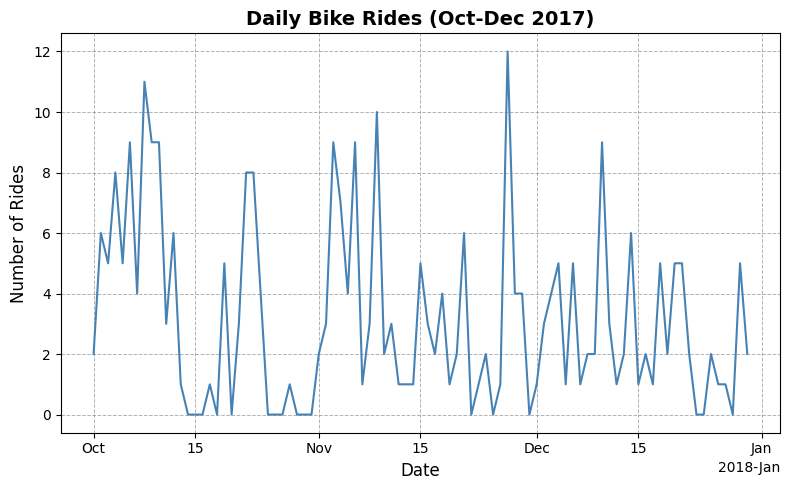

In [221]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

# Resample rides to the daily level, based on the Start date column.
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the daily counts
sns.lineplot(data=rides.resample("D", on="Start date").size(), color="steelblue", ax=ax)

# Title and axis labels
ax.set_title("Daily Bike Rides (Oct-Dec 2017)", fontsize=14, fontweight="bold")
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Rides", fontsize=12)

# Grid styling
ax.grid(True, alpha=0.6, linewidth=0.7, color="grey", linestyle="--")

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Adjust layout and render
plt.tight_layout()
plt.show()

Since the daily time series is so noisy for this one bike, change the resampling to be monthly.

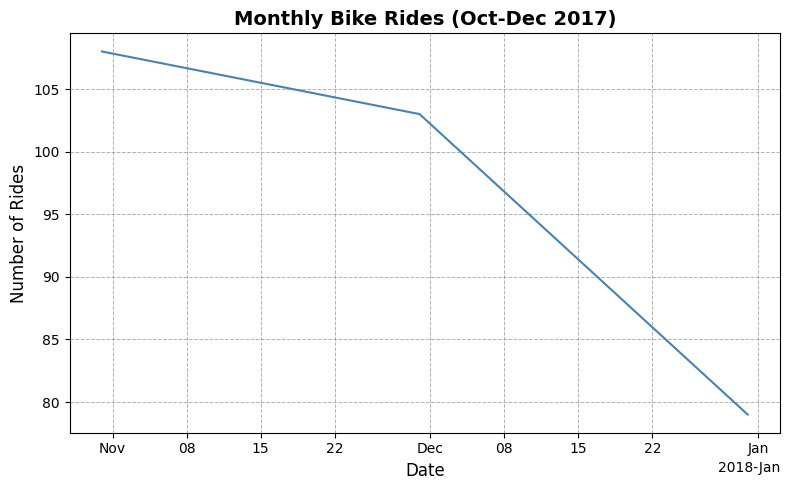

In [222]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

# Since the daily time series is so noisy for this one bike, change the resampling to be monthly.
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(rides.resample("ME", on="Start date").size(), color="Steelblue", ax=ax)

ax.set_title("Monthly Bike Rides (Oct-Dec 2017)", fontsize=14, fontweight="bold")
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Rides", fontsize=12)

ax.grid(True, alpha=0.6, linewidth=0.7, color="grey", linestyle="--")

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [223]:
# Set monthly_rides to be a resampled version of rides, by month, based on start date.
monthly_rides = rides.resample("ME", on="Start date")["Member type"]

# Take the ratio of the .value_counts() over the total number of rides
display(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
dtype: float64

### Combining groupby() and resample()
A very powerful method in Pandas is `.groupby()`. Whereas `.resample()` groups rows by some time or date information, `.groupby()` groups rows based on the values in one or more columns. For example, `rides.groupby('Member type').size()` would tell us how many rides there were by member type in our entire DataFrame.

`.resample()` can be called after `.groupby()`. For example, how long was the median ride by month, and by Membership type?

In [224]:
# Group rides by member type, and resample to the month
grouped = rides.groupby("Member type").resample("ME", on="Start date")

# Print the median duration for each group
display(grouped["Duration"].median())

Member type  Start date
Casual       2017-10-31          0 days 00:27:16
             2017-11-30   0 days 00:19:19.500000
             2017-12-31          0 days 00:14:10
Member       2017-10-31          0 days 00:11:11
             2017-11-30          0 days 00:10:55
             2017-12-31   0 days 00:06:27.500000
Name: Duration, dtype: timedelta64[ns]

## Handling Time Zones in Pandas

A `datetime` column in pandas can be either **naive** (with no time zone information) or **aware** (associated with a specific time zone). Performing accurate time-based arithmetic, especially across regions with Daylight Saving Time (DST), requires making your `datetime` data aware.

### Localizing Naive Datetimes

To assign a time zone to a naive `datetime` column, you use the `.dt.tz_localize()` method. This does not *convert* the time; it *stamps* the existing wall times with a time zone, interpreting them as belonging to that locale.

```python
import pandas as pd

# Create a sample DataFrame with naive datetimes
df = pd.DataFrame({
    'event_time': pd.to_datetime([
        '2025-03-09 01:30:00', # Before DST Spring Forward
        '2025-11-02 01:30:00', # During DST Fall Back (ambiguous hour)
        '2025-11-02 01:30:00'  # Second instance in ambiguous hour
    ])
})
```

Localizing works directly if there are no ambiguities:

```python
# This works, but will raise an error if ambiguous times exist
# df['event_time'].dt.tz_localize('America/New_York')
```

### Handling Ambiguous and Non-Existent Times

DST transitions create tricky situations. The "fall back" transition (e.g., when 2:00 AM becomes 1:00 AM again) creates an **ambiguous hour**, where a local time like 1:30 AM occurs twice. If you try to localize data containing such a time, pandas will raise an `AmbiguousTimeError` because it doesn't know whether to assign the pre-transition or post-transition UTC offset.

The `ambiguous` argument in `.dt.tz_localize()` provides the solution. A common strategy is to mark these ambiguous times as `NaT` (Not a Time), which allows you to easily find and handle them later.

```python
# Localize the column, handling ambiguous times by replacing them with NaT
df['event_time_aware'] = df['event_time'].dt.tz_localize(
    'America/New_York', 
    ambiguous='NaT'
)

```

### Converting Between Time Zones

Once a column is timezone-aware, you can correctly convert it to any other time zone using `.dt.tz_convert()`. This method correctly adjusts the wall time to represent the same instant in the target time zone.

```python
# Convert the New York time to London time
df['event_time_london'] = df['event_time_aware'].dt.tz_convert('Europe/London')
print(df)
```

### Extracting Datetime Components

The `.dt` accessor provides a simple, vectorized way to extract individual parts of a `datetime` object from an entire Series.

```python
# Assume df['event_time_aware'] is our aware datetime column

# Extract year
print(f"\nYear:\n{df['event_time_aware'].dt.year}")

# Extract weekday name
print(f"\nWeekday Name:\n{df['event_time_aware'].dt.day_name()}")

# Extract hour
print(f"\nHour:\n{df['event_time_aware'].dt.hour}")
```
### Time-Series Specific Operations: `.shift()`

The `.shift()` method is invaluable for time-series analysis. It moves the data in a Series or DataFrame forward or backward by a specified number of periods, which is essential for calculating period-over-period differences or creating lagged features.

  * **Why**: To compare observations at a given time `t` with observations at time `t-1` (or any other offset).
  * **How**: Call `.shift(n)` on a Series, where `n` is the number of periods to shift. A positive `n` shifts data down (forward in time), while a negative `n` shifts it up (backward in time).

Let's use `.shift()` to calculate the time between the end of one event and the start of the next.

```python
# Create a more complete example DataFrame
df_rides = pd.DataFrame({
    'start_time': pd.to_datetime(['2025-01-01 09:00', '2025-01-01 09:30', '2025-01-01 10:15']),
    'end_time': pd.to_datetime(['2025-01-01 09:15', '2025-01-01 09:42', '2025-01-01 10:30'])
})

# Shift the 'end_time' column down by one period
df_rides['previous_end_time'] = df_rides['end_time'].shift(1)

# Calculate the time between the start of one ride and the end of the previous one
df_rides['downtime'] = df_rides['start_time'] - df_rides['previous_end_time']

```


In [225]:
# Try to set a timezone 
# rides["Start date"] = rides["Start date"].dt.tz_localize("America/New_York")

In [226]:
# Handle ambiguous datetimes 
ny_tz = "America/New_York"

dt_columns = rides.select_dtypes(include=["datetime64[ns]"]).columns

for col in dt_columns:
    rides[col] = rides[col].dt.tz_localize(ny_tz, ambiguous="NaT")
    
# Re-calculate duration, ignoring bad row 
rides["Duration"] = rides["End date"] - rides["Start date"]

# Find the minimum again 
rides["Duration"].dt.total_seconds().min()

np.float64(116.0)

In [227]:
# Create a boolean mask. It's True for rows with a NaT in any datetime column.
is_nat_mask = rides[dt_columns].isnull().any(axis=1)

# Use the mask to select and display the problematic rows
ambiguous_rides = rides[is_nat_mask]

display(ambiguous_rides)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
129,NaT,NaT,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member,NaT


### How long per weekday?
Pandas has a number of datetime-related attributes within the `.dt` accessor. Many of them are ones you've encountered before, like `.dt.month`. Others are convenient and save time compared to standard Python, like `.dt.day_name()`.

In [229]:
# Add a new column to rides called 'Ride start weekday', which is the weekday of the Start date.
rides["Ride start weekday"] = rides["Start date"].dt.day_name()

# Print the median trip time per weekday 
display(rides.groupby("Ride start weekday")["Duration"].median())

Ride start weekday
Friday      0 days 00:12:04.500000
Monday      0 days 00:13:30.500000
Saturday           0 days 00:07:42
Sunday             0 days 00:15:17
Thursday           0 days 00:10:52
Tuesday     0 days 00:10:41.500000
Wednesday          0 days 00:09:45
Name: Duration, dtype: timedelta64[ns]

In [230]:
# Calculate the difference in the Start date of the current row and the End date of the previous row and assign it to rides['Time since'].
rides["Time since"] = rides["Start date"] - (rides["End date"].shift(1))

# Convert rides['Time since'] to seconds to make it easier to work with.
rides["Time since"] = rides["Time since"].dt.total_seconds()

# Resample rides to be in monthly buckets according to the Start date.
monthly = rides.resample("ME", on="Start date")

# Divide the average by (60*60) to get the number of hours on average that W20529 waited in the dock before being picked up again.
print(monthly["Time since"].mean()/(60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64
